In [18]:
import os
import sys
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [19]:
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

In [20]:
figsave_format = '.pdf'
figsave_dpi = 200

In [21]:
# There should be 4095 bins in the amplitude-analizator, but only 4083 did actually work
amp_an_bins = 4083
# Equation for transforming from bins to keV
# keV = 0.9255 * BIN_VALUE - 1.7434
LOWER_LIM = 0.9255 * 0 - 1.7434
UPPER_LIM = 0.9255 * amp_an_bins - 1.7434
# Bins with energy values
energy_bins = np.linspace(LOWER_LIM, UPPER_LIM, amp_an_bins)

In [24]:
with open('../data/spectra.dat') as f:
    lines = [line.split('\n')[0] for line in f]
    data_heights = [int(line) \
                    for line in lines[lines.index('<<DATA>>')+1:lines.index('<<END>>')]]
    data_roi = sorted([[int(i) for i in line.split(' ')] \
                       for line in lines[lines.index('<<ROI>>')+1:lines.index('<<DATA>>')]])

# Convert ROI to keV from bin values
data_roi_corr = [[0.9255 * x - 1.7434 for x in i] for i in data_roi]

# Create histogram bins for plot
data_binned = np.concatenate([[energy_bins[idx] for k in range(num)] for idx, num in enumerate(data_heights)])

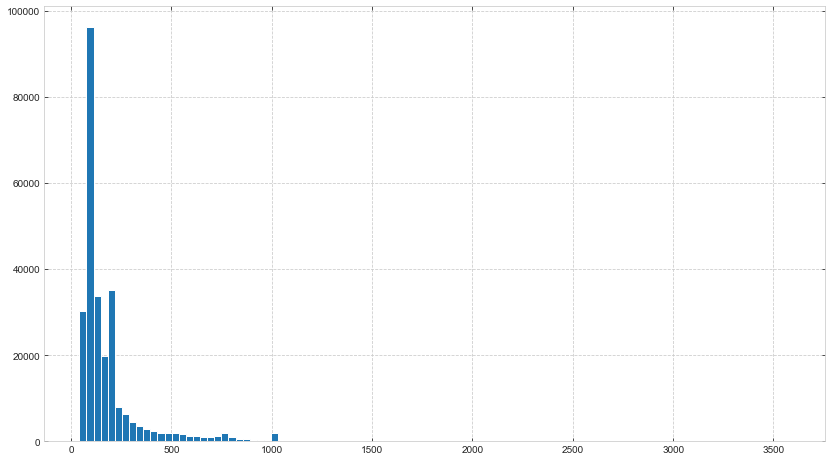

In [35]:
plt.figure(figsize=(14,8))
plt.hist(x=data_binned, bins=100)
plt.show()

## Plot spectra and characteristic peaks peaks

In [51]:
def plot_spectra(lims=None, save=False, plot_type='line'):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(ncols*14,nrows*12))
    G = gridspec.GridSpec(nrows, ncols)
    G.update(hspace=0.35, wspace=0.2)
    axes = [plt.subplot(G[i]) for i in range(ncols)]

    suptitlesize = 50
    titlesize = 40
    axislabelsize = 40
    axisticksize = 30
    
    if lims is not None:
        linewdt = 5
        plt.suptitle('One of the gamma peak of my sample\n'+
                     '(small, yellow crystal)\n',
                     fontweight='bold', fontsize=suptitlesize, y=1.08)
        
    else:
        linewdt = 2
        plt.suptitle('Gamma spectra of my measured sample\n'+
                     '(small, yellow crystal)',
                     fontweight='bold', fontsize=suptitlesize, y=1.08)

    # Linear scale
    if plot_type == 'line':
        axes[0].plot(energy_bins, data_heights, lw=linewdt)
    elif plot_type == 'hist':
        axes[0].hist()
    
    axes[0].set_title('Linear scale', fontsize=titlesize, y=1.02)

    # Log scale
    if plot_type == 'line':
        axes[1].plot(energy_bins, data_heights, lw=linewdt)
    elif plot_type == 'hist':
        axes[1].hist()
    
    axes[1].set_yscale('log')
    axes[1].set_title('Logarithmic scale', fontsize=titlesize, y=1.02)

    for i in range(ncols):
        axes[i].set_xlabel('Energy [keV]', fontsize=axislabelsize)
        axes[i].set_ylabel('Intensity [n]', fontsize=axislabelsize)
        axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
        if lims is not None:
            assert(np.shape(lims) == (2, 2)), "\'lims\' should be a (2,2) shape array!"
            axes[i].set_xlim(lims[0][0], lims[0][1])
            axes[i].set_ylim(1, lims[1][1])

    if save:
        if lims is not None:
            plt.savefig(('../out/spectra_lims_{0}_{1}'.format(lims[0][0], lims[0][1])) +
                         figsave_format,
                        format=figsave_format,
                        dpi=figsave_dpi,
                        bbox_inches='tight')
        else:
             plt.savefig('../out/full_spectra' +
                         figsave_format,
                         format=figsave_format,
                         dpi=figsave_dpi,
                         bbox_inches='tight')   
            
    plt.show()

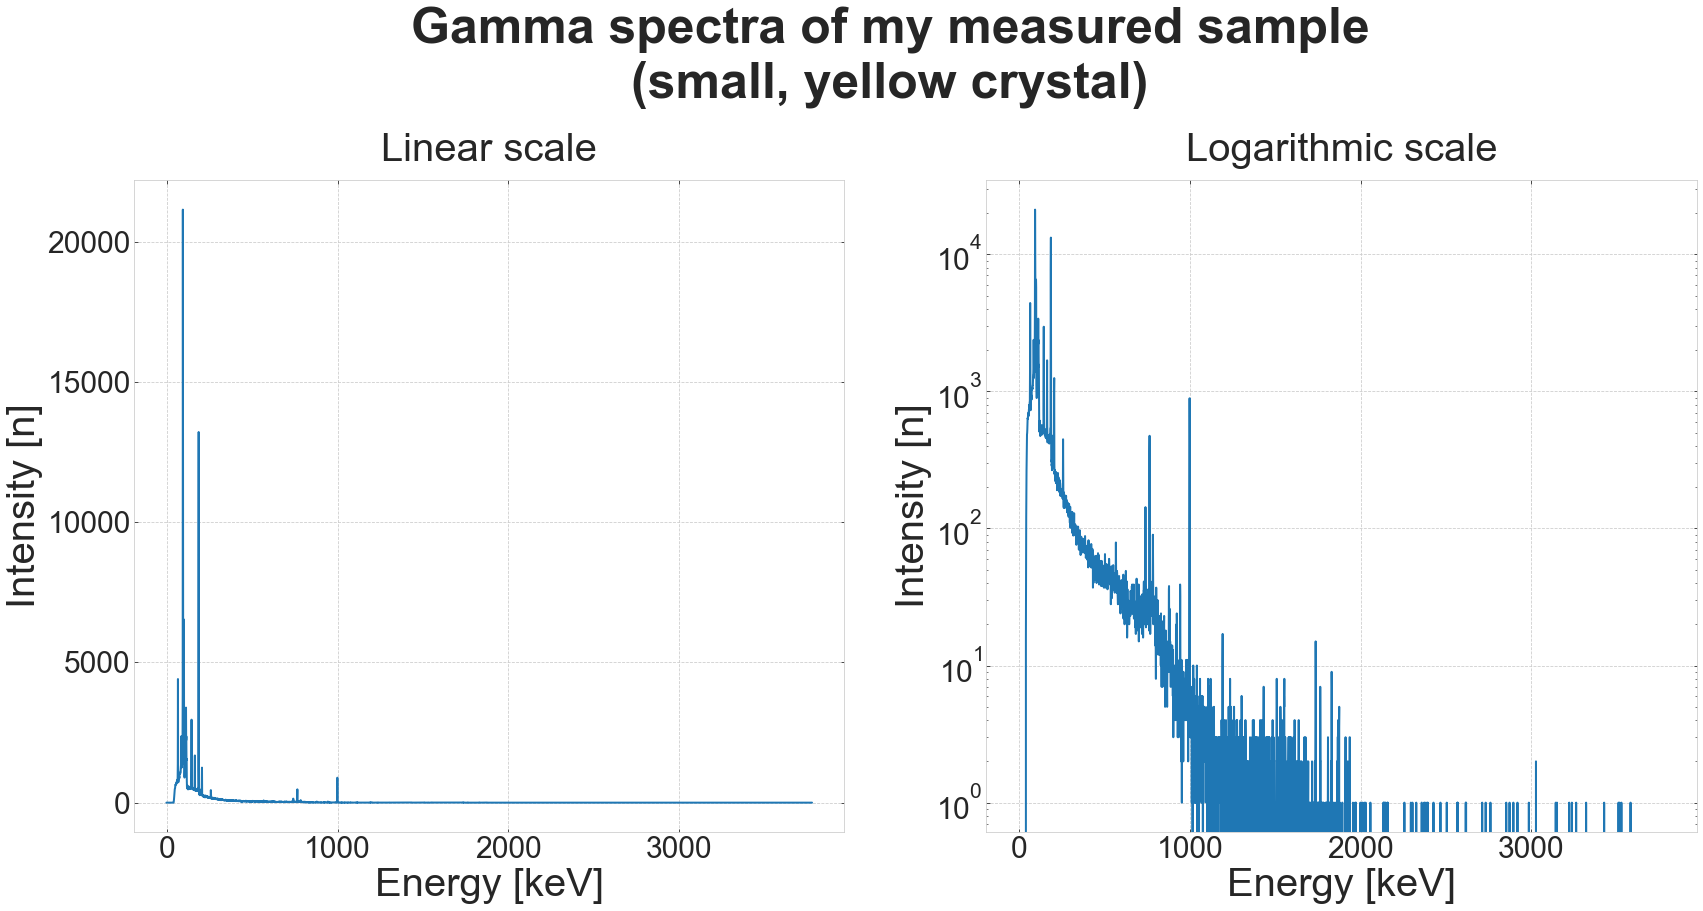

In [52]:
plot_spectra(lims=None, save=False)

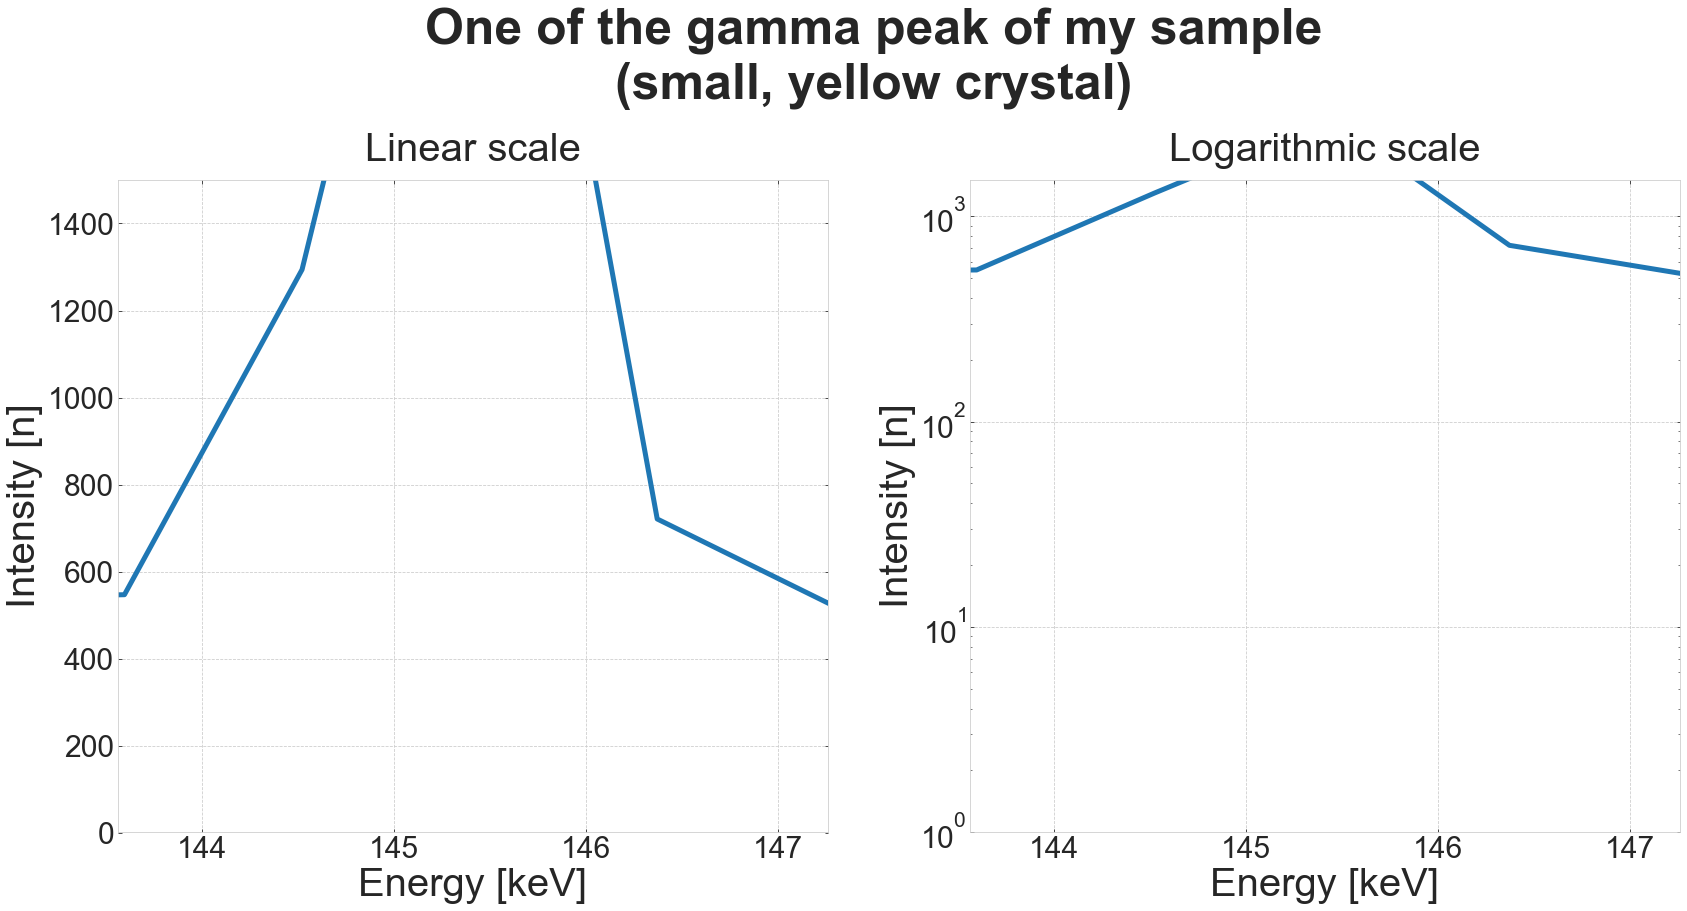

In [53]:
plot_spectra(lims=(data_roi_corr[0], [0,1500]), save=False)